In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Load the dataset
housing_data = pd.read_csv("Datasets/Housing.csv") 

# Display the first few rows of the dataset
housing_data.head()

# Drop 'id' and 'date' as they are not relevant for the model
housing_data = housing_data.drop(['id', 'date'], axis=1)

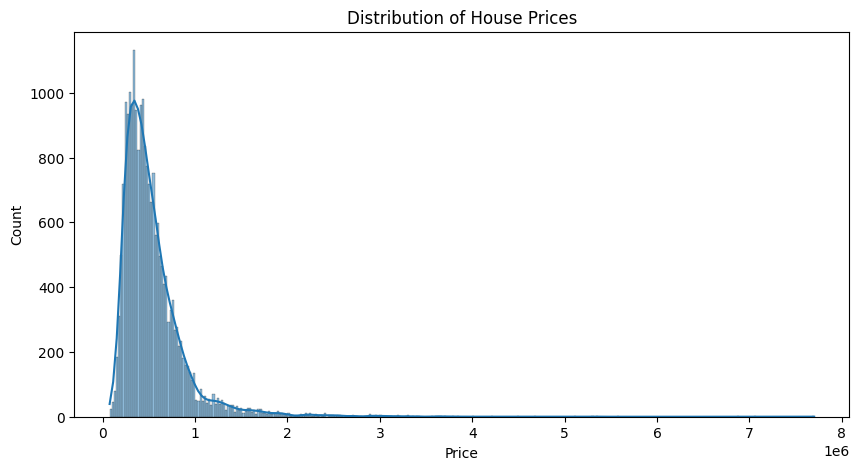

In [6]:
# Exploratory Data Analysis (EDA)

## Distribution of 'price' feature (target variable)
plt.figure(figsize=(10, 5))
sns.histplot(housing_data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

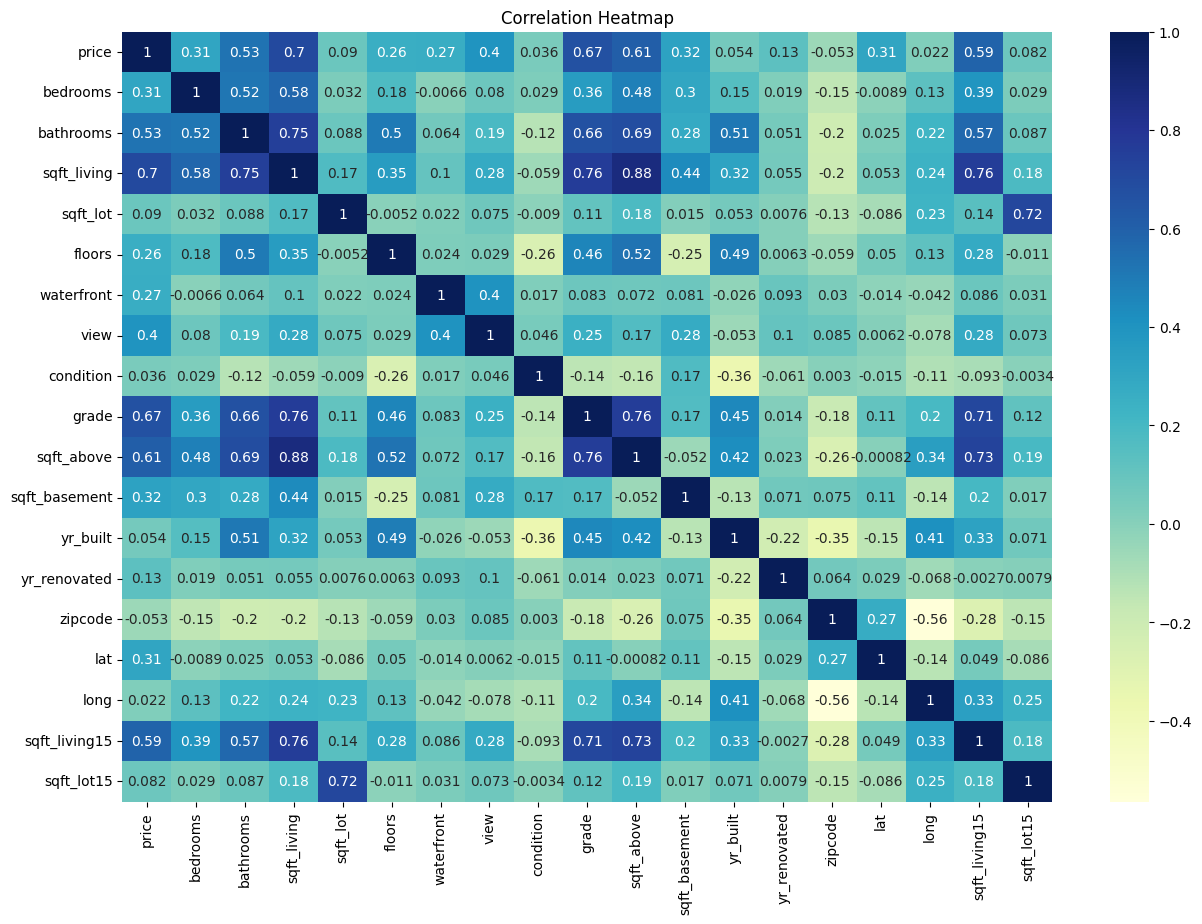

In [7]:
## Displaying correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Defining features (X) and target (y)
X = housing_data.drop('price', axis=1)  # Features
y = housing_data['price']               # Target variable

In [9]:
# Splitting data into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Training: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Model Prediction
y_pred = model.predict(X_test)

In [12]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 127493.63027964467
Mean Squared Error (MSE): 45173027114.56448
Root Mean Squared Error (RMSE): 212539.47189772653
R-squared (R2): 0.7011905706891329


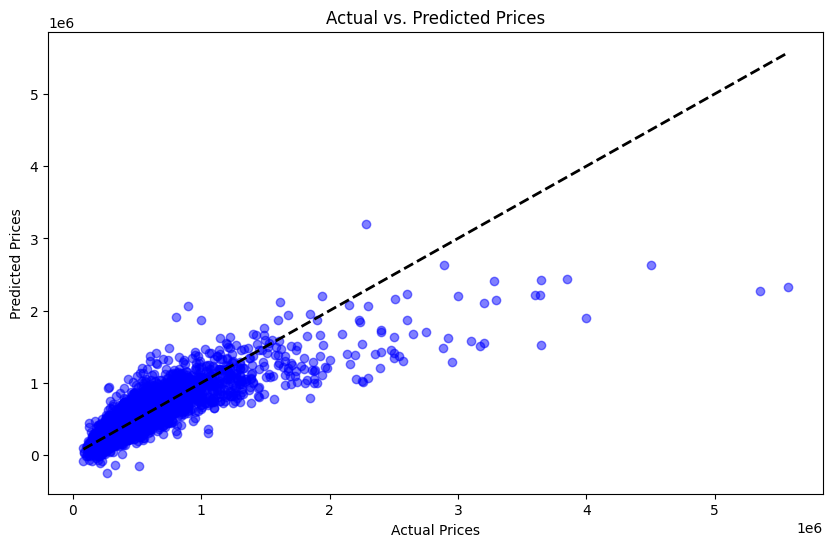

In [13]:
# Visualizing the Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

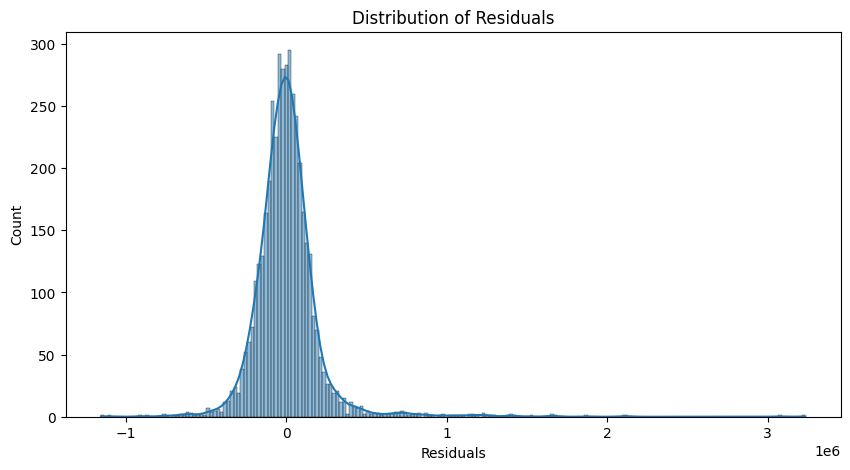

In [14]:
# Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()
